In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
sales = pd.read_csv('../data/sales.csv')
sales.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [4]:
sales=sales.drop(["Unnamed: 0"],axis=1)

In [5]:
sales

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...
640835,409,6,2013-10-26,483,1,0,0,0,4553
640836,97,1,2014-04-14,987,1,1,0,0,12307
640837,987,1,2014-07-07,925,1,0,0,0,6800
640838,1084,4,2014-06-12,725,1,0,0,0,5344


In [44]:
sales[sales["open"]==0]["sales"].unique()

array([0])

In [6]:
#sales['date']=pd.to_datetime(sales['date'],errors)

sales['date'] = pd.to_datetime(sales['date'],format='%Y-%m-%d')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   store_ID             640840 non-null  int64         
 1   day_of_week          640840 non-null  int64         
 2   date                 640840 non-null  datetime64[ns]
 3   nb_customers_on_day  640840 non-null  int64         
 4   open                 640840 non-null  int64         
 5   promotion            640840 non-null  int64         
 6   state_holiday        640840 non-null  object        
 7   school_holiday       640840 non-null  int64         
 8   sales                640840 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 44.0+ MB


In [8]:
sales["state_holiday"].unique()

array(['0', 'a', 'c', 'b'], dtype=object)

In [9]:
mapping = {'0': 0, 'a': 1, 'b': 1, 'c': 1}

In [10]:
#sales["state_holiday"]=sales["state_holiday"].mapping{'0': 0, 'a': 1, 'b': 1, 'c': 1}

In [11]:
sales['state_holiday'] = sales['state_holiday'].map(mapping)

In [12]:
#sales["state_holiday"].unique()

In [13]:
sales["state_holiday"].unique()

array([0, 1])

In [14]:
sales.isna().sum()

store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64

In [15]:
corr_matrix=sales.corr()

/var/folders/90/k9fypstn4y12th_l5jjxyxt00000gn/T/ipykernel_87891/2630652120.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=sales.corr()


In [16]:
corr_matrix

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
store_ID,1.000000,0.000329,0.023605,-0.001108,-0.000364,0.000503,-0.000706,0.004804
day_of_week,0.000329,1.000000,-0.385616,-0.527947,-0.392736,-0.053206,-0.206069,-0.461107
nb_customers_on_day,0.023605,-0.385616,1.000000,0.617264,0.315858,-0.227339,0.071085,0.894872
open,-0.001108,-0.527947,0.617264,1.000000,0.294936,-0.379613,0.085213,0.678463
promotion,-0.000364,-0.392736,0.315858,0.294936,1.000000,-0.012813,0.066565,0.451819
state_holiday,0.000503,-0.053206,-0.227339,-0.379613,-0.012813,1.000000,0.149864,-0.254896
school_holiday,-0.000706,-0.206069,0.071085,0.085213,0.066565,0.149864,1.000000,0.084484
sales,0.004804,-0.461107,0.894872,0.678463,0.451819,-0.254896,0.084484,1.000000


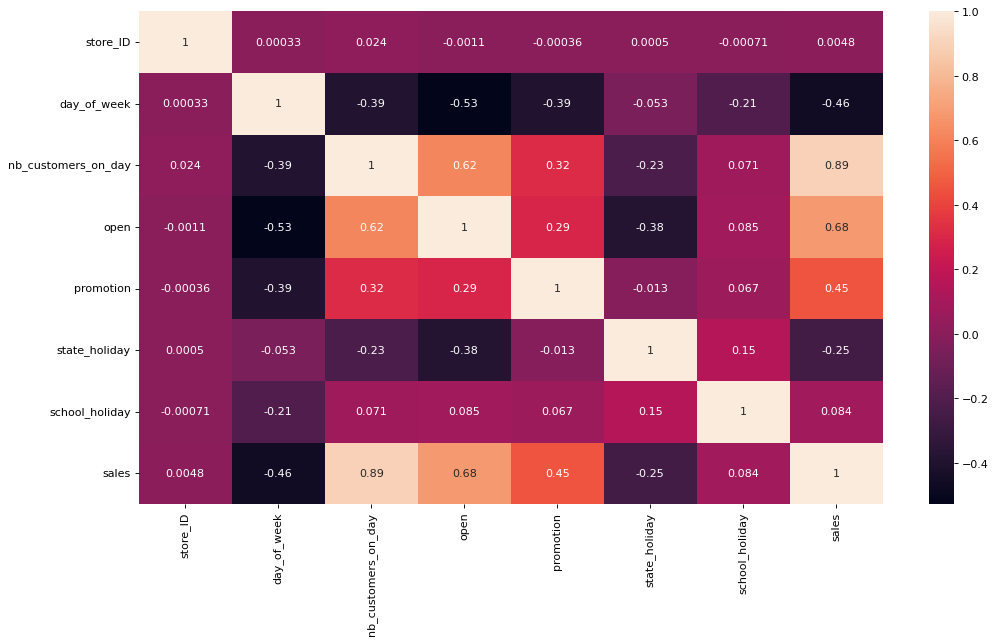

In [17]:
plt.figure(figsize=(15,8), dpi=80) 
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:
sales[(sales['state_holiday']==1) & (sales['open']==1)]

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
216,676,3,2014-01-01,946,1,0,1,1,5755
1529,582,1,2014-06-09,493,1,0,1,0,2146
1984,178,4,2013-05-30,962,1,1,1,0,10796
6382,780,4,2015-06-04,1060,1,1,1,0,8646
6465,178,4,2015-06-04,964,1,1,1,0,12155
...,...,...,...,...,...,...,...,...,...
637520,318,4,2014-06-19,755,1,1,1,0,8610
637629,95,4,2015-06-04,884,1,1,1,0,8317
638583,777,5,2014-10-03,190,1,1,1,0,1880
639009,1074,4,2013-05-30,679,1,1,1,0,6758


In [19]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [20]:
sales['date'] = sales['date'].apply(lambda x: x.toordinal())

In [21]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   store_ID             640840 non-null  int64
 1   day_of_week          640840 non-null  int64
 2   date                 640840 non-null  int64
 3   nb_customers_on_day  640840 non-null  int64
 4   open                 640840 non-null  int64
 5   promotion            640840 non-null  int64
 6   state_holiday        640840 non-null  int64
 7   school_holiday       640840 non-null  int64
 8   sales                640840 non-null  int64
dtypes: int64(9)
memory usage: 44.0 MB


## Split train and test data (w/o date column)

In [22]:
y=sales['sales']
X=sales.drop(columns=['sales','date'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

## Prediction models

In [24]:
#Linear regression

# Create linear regression
regr = LinearRegression()

# Train the linear regression
model = regr.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

0.8547076842639173

In [39]:
y_with_date=sales['sales']
X_with_date=sales.drop(columns=['sales'])

X_train, X_test, y_train, y_test = train_test_split(X_with_date, y_with_date, test_size=0.33, random_state = 1)

#Linear regression

# Create linear regression
regr = LinearRegression()

# Train the linear regression
model = regr.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

y_test_pred = model.predict(X_test)

display(y_test_pred)


array([ 6878.6106091 , 10838.98443938,   873.97387126, ...,
        9205.17949799,    44.67179687,  5414.33174503])

In [40]:
Y_pred_test_df = pd.DataFrame(y_test_pred, columns=['y_test_pred'], index=X_test.index)

result = pd.concat([X_test, Y_pred_test_df], axis=1)

In [41]:
result

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,y_test_pred
235371,924,2,735590,807,1,0,0,1,6878.610609
613498,1081,2,735359,1281,1,1,0,0,10838.984439
239642,215,4,735403,0,0,1,1,1,873.973871
457903,783,6,735083,582,1,0,0,0,4953.821691
458334,165,2,735184,408,1,0,0,0,4336.431601
...,...,...,...,...,...,...,...,...,...
501579,78,1,735701,633,1,1,0,0,7284.367634
344618,7,7,735238,0,0,0,0,0,35.091189
607554,206,4,735529,1003,1,1,0,0,9205.179498
375587,184,7,735322,0,0,0,0,0,44.671797


In [ ]:
#Decision tree

# Create decision tree classifer object
regr = DecisionTreeRegressor()

# Train regression tree model
model = regr.fit(X_train, y_train)

# Score the model
regr.score(X_test, y_test)

In [ ]:
training_R2 = []
test_R2 = []

# try max_depth from 1 to 20
max_depth = range(1,20)

for depth in max_depth:
  tree = DecisionTreeRegressor(max_depth= depth)
  tree.fit(X_train, y_train)

  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)
 
  training_R2.append(r2_score(y_train, y_train_pred))
  test_R2.append(r2_score(y_test, y_test_pred))

plt.plot(max_depth, training_R2, label="training R2")
plt.plot(max_depth, test_R2, label="test R2")
plt.ylabel("R2")
plt.xlabel("max_depth")
plt.legend()

plt.show()

In [ ]:
#10 branches is the optimal

In [45]:
#Decision tree

# Create decision tree classifer object
regr = DecisionTreeRegressor(max_depth=10)

# Train regression tree model
model = regr.fit(X_train, y_train)

# Score the model
print(regr.score(X_test, y_test))

print(regr.score(X_train, y_train))

0.8861873811159897
0.888552778915641


In [46]:
bagging_reg = BaggingRegressor(
    DecisionTreeRegressor(max_depth=10),
    n_estimators=50,
    max_samples=100,
    random_state=1)

In [47]:
bagging_reg.fit(X_train, y_train)
bagging_reg.score(X_test,y_test)

0.8561944705148784

In [ ]:
forest = RandomForestRegressor(n_estimators=10, # same 10 trees
                               max_depth=3, # depth 3 to force tree to be "weak"
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
forest.fit(X_train, y_train)
forest.score(X_test,y_test)